In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import csv

In [2]:
d="data.csv"

In [4]:
print(d)

data.csv


In [66]:
df= pd.read_csv('data.csv')

In [67]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave0points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave0points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [68]:
df['diagnosis'] = df['diagnosis'].astype("category").cat.codes

In [69]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave0points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave0points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [70]:
df.isnull().any().any()

False

In [71]:
df.isnull().sum().sum()

0

In [72]:
font_color = '#e8e8e8'
hfont = {'fontname':'Calibri'}
facecolor = '#d4d4d4'

<AxesSubplot:>

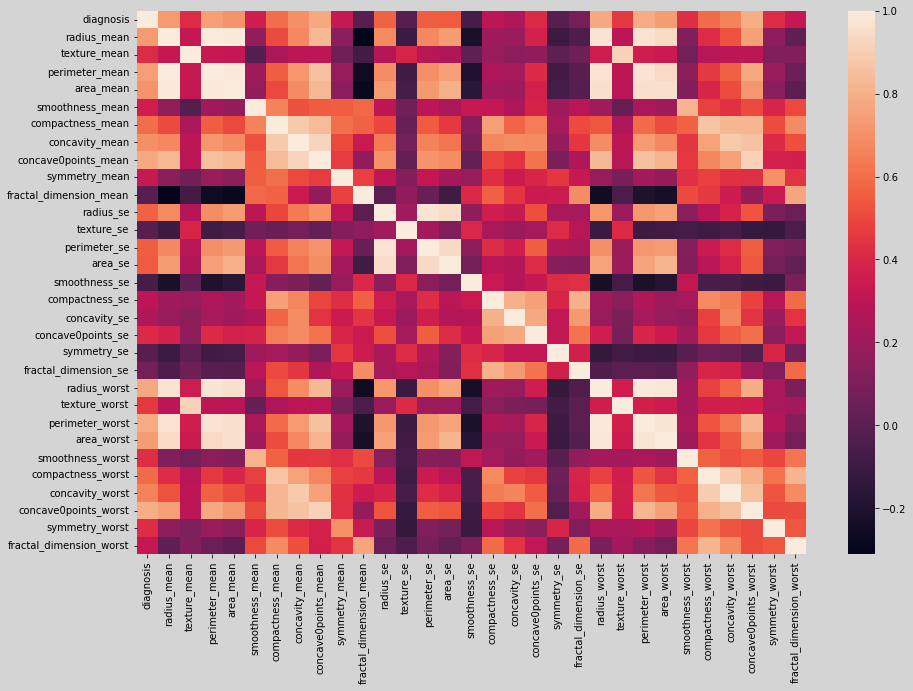

In [73]:
df_corr = df.iloc[:,1:32].corr()
fig, ax = plt.subplots(figsize=(15, 10), facecolor=facecolor)
sns.heatmap(df_corr)

In [74]:
df=df.dropna()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int8   
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave0points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# CLUSTERING

In [76]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [77]:
clst = KMeans(n_clusters=3)
clst.fit(df)
clust_cat = clst.predict(df)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)

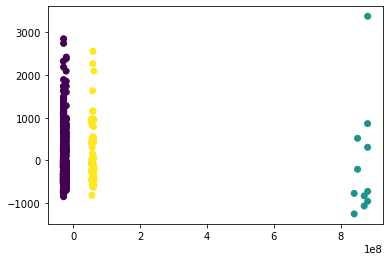

In [78]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=clust_cat)
plt.show()

In [79]:
x = df.drop(['diagnosis'], axis=1)
y = df[['diagnosis']]

In [80]:
x

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave0points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave0points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [81]:
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


# TEST AND TRAIN SPLITTING

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state =0)

In [82]:
x_train

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave0points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave0points_worst,symmetry_worst,fractal_dimension_worst
395,903811,14.060,17.18,89.75,609.1,0.08045,0.05361,0.02681,0.03251,0.1641,...,14.920,25.34,96.42,684.5,0.10660,0.12310,0.0846,0.07911,0.2523,0.06609
393,903516,21.610,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,...,26.230,28.74,172.00,2081.0,0.15020,0.57170,0.7053,0.24220,0.3828,0.10070
381,901836,11.040,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,0.2003,...,12.090,20.83,79.73,447.1,0.10950,0.19820,0.1553,0.06754,0.3202,0.07287
198,877486,19.180,22.49,127.50,1148.0,0.08523,0.14280,0.11140,0.06772,0.1767,...,23.360,32.06,166.40,1688.0,0.13220,0.56010,0.3865,0.17080,0.3193,0.09221
145,869476,11.900,14.65,78.11,432.8,0.11520,0.12960,0.03710,0.03003,0.1995,...,13.150,16.51,86.26,509.6,0.14240,0.25170,0.0942,0.06042,0.2727,0.10360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,8911670,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,...,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.2210,0.12940,0.2567,0.05737
9,84501001,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.1050,0.22100,0.4366,0.20750
359,901034301,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,...,12.020,25.02,75.79,439.6,0.13330,0.10490,0.1144,0.05052,0.2454,0.08136
192,875099,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0000,0.00000,0.1909,0.06559


In [83]:
x_test

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave0points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave0points_worst,symmetry_worst,fractal_dimension_worst
512,915691,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,...,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
457,9112367,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
439,909410,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
298,892214,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
37,854941,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,89382602,12.76,13.37,82.29,504.1,0.08794,0.07948,0.04052,0.02548,0.1601,...,14.19,16.40,92.04,618.8,0.11940,0.22080,0.17690,0.08411,0.2564,0.08253
555,924934,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,...,10.84,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283
481,91227,13.90,19.24,88.73,602.9,0.07991,0.05326,0.02995,0.02070,0.1579,...,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
344,89864002,11.71,15.45,75.03,420.3,0.11500,0.07281,0.04006,0.03250,0.2009,...,13.06,18.16,84.16,516.4,0.14600,0.11150,0.10870,0.07864,0.2765,0.07806


In [84]:
y_train

,diagnosis
395,0
393,1
381,0
198,1
145,0
...,...
277,1
9,1
359,0
192,0


In [85]:
y_test

,diagnosis
512,1
457,0
439,0
298,0
37,0
...,...
312,0
555,0
481,0
344,0


# RANDOM FOREST CLASSIFIER

In [86]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=2509)
classifier.fit(x_train, y_train)

C:\Users\91700\AppData\Local\Temp/ipykernel_17448/2058895851.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train, y_train)


RandomForestClassifier(random_state=2509)

In [87]:
classifier.score(x_test,y_test)

0.9368421052631579

In [88]:
prediction = classifier.predict(x_test)

In [89]:
from sklearn.metrics import accuracy_score
print('Accuracy score of random forest classifier: %.3f' % accuracy_score(y_test, prediction))

Accuracy score of random forest classifier: 0.937


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       184
           1       0.95      0.87      0.91       101

    accuracy                           0.94       285
   macro avg       0.94      0.92      0.93       285
weighted avg       0.94      0.94      0.94       285



# DECISION TREE

In [91]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()

In [92]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [93]:
decision_tree.score(x_test,y_test)

0.9298245614035088

In [94]:
prediction_dt = classifier.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score
print('Accuracy score of decision tree classifier: %.3f' % accuracy_score(y_test, prediction_dt))

Accuracy score of decision tree classifier: 0.937


In [96]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(y_test, prediction_dt))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       184
           1       0.95      0.87      0.91       101

    accuracy                           0.94       285
   macro avg       0.94      0.92      0.93       285
weighted avg       0.94      0.94      0.94       285

